# (1) Load Data

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [8]:
import numpy as np

In [4]:
df_X = diabetes.data
df_y = diabetes.target #Target seems to be numeric float

In [5]:
df_X.shape, df_y.shape # There are 10 features with the N= 442. 

((442, 10), (442,))

In [9]:
np.mean(df_y)

152.13348416289594

# (2) Prepare X

In [10]:
print(f"df_X is a {df_X.dtype} where data structure is {type(df_X)}")

df_X is a float64 where data structure is <class 'numpy.ndarray'>


In [17]:
X = np.array(df_X)

In [13]:
df_X[:10,:10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [18]:
X[:10, :10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

# (3) Prepare y

In [15]:
print(f"df_y is a {df_y.dtype} where data structure is {type(df_y)}")

df_y is a float64 where data structure is <class 'numpy.ndarray'>


In [19]:
y = np.array(df_y)

# (4) split train, test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
tr_X, ts_X, tr_y, ts_y = train_test_split(X, y, test_size=0.23, random_state = 926) # train X test X train y test Y order

# (5) Prepare Model

In [22]:
print(f"X has a shape of {X.shape}")

X has a shape of (442, 10)


In [23]:
import numpy as np
# initialize the weight and bias
W = np.random.rand(df_X.shape[1]) #weight has a length of feature vectores
b = np.random.rand(1) # bias term = 1

print(W.shape, b.shape)

(10,) (1,)


In [24]:
def model(X, W, b):
    # initialize the prediction
    predictions = 0
    for i in range(W.shape[0]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [26]:
model(X, W, b).shape

(442,)

# (6) Define loss func

In [27]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # averaging difference between two values
    return mse

In [28]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# (7) Define gradient func

In [29]:
def gradient(X, W, b, y):
    # N: Number of data
    N = len(y)
    
    # Calculate y_pred
    y_pred = model(X, W, b)
    
    # Calculate the gradient 
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # Calculate the gradient of the bias
    db = 2 * (y_pred - y).mean()
    return dW, db

In [30]:
dW, db = gradient(df_X, W, b, df_y)
dW.shape, db.shape

((10,), ())

# (8) Set hyperparameter

In [35]:
LEARNING_RATE = 0.1

# (9) Train model

In [36]:
losses = []

for i in range(1, 10000):
    dW, db = gradient(tr_X, W, b, tr_y) # get the gradient
    W -= LEARNING_RATE * dW #update weight based on the learning rate 
    b -= LEARNING_RATE * db #update bias based onthe learning rate
    L = loss(tr_X, W, b, tr_y) #calculate the loss
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3444.0719
Iteration 2000 : Loss 3155.1671
Iteration 3000 : Loss 3057.4937
Iteration 4000 : Loss 3019.1677
Iteration 5000 : Loss 3003.1342
Iteration 6000 : Loss 2995.9011
Iteration 7000 : Loss 2992.2790
Iteration 8000 : Loss 2990.2049
Iteration 9000 : Loss 2988.8316


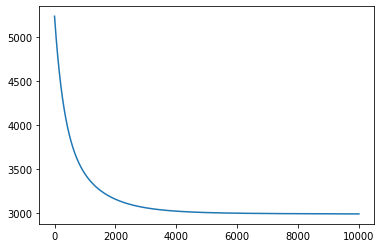

In [37]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# (10) test 데이터에 대한 성능 확인하기

In [38]:
predictions = model(ts_X, W, b)
L = MSE(predictions, ts_y)
L

2594.562777831541

# (11) 정답 데이터와 예측한 데이터 시각화하기

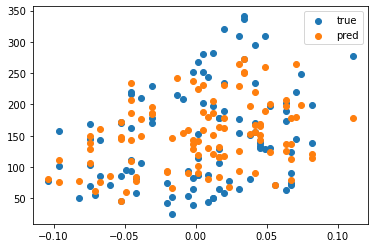

In [39]:
plt.scatter(ts_X[:, 0], ts_y, label='true')
plt.scatter(ts_X[:, 0], predictions, label='pred')
plt.legend()
plt.show()